# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet pandas matplotlib numpy



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


c:\Users\loste\OneDrive\Desktop\prophet-challenge\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [5]:
import pandas as pd
import numpy as np

# Create a date range from Jan 1, 2020, to Dec 31, 2020 (hourly)
date_rng = pd.date_range(start="2020-01-01", end="2020-12-31", freq="H")

# Generate fake search trends data with random values
np.random.seed(42)  # Ensures reproducibility
search_trends = np.random.randint(50, 200, size=len(date_rng))  # Simulated search trends

# Create DataFrame
df_mercado_trends = pd.DataFrame({"Date": date_rng, "Search Trends": search_trends})

# Set 'Date' as index
df_mercado_trends.set_index("Date", inplace=True)

# Display first and last five rows
display(df_mercado_trends.head(), df_mercado_trends.tail())

C:\Users\loste\AppData\Local\Temp\ipykernel_6456\1846837325.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start="2020-01-01", end="2020-12-31", freq="H")


,Search Trends
Date,
2020-01-01 00:00:00,152
2020-01-01 01:00:00,142
2020-01-01 02:00:00,64
2020-01-01 03:00:00,156
2020-01-01 04:00:00,121


,Search Trends
Date,
2020-12-30 20:00:00,86
2020-12-30 21:00:00,78
2020-12-30 22:00:00,138
2020-12-30 23:00:00,149
2020-12-31 00:00:00,171


In [5]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8761 entries, 2020-01-01 00:00:00 to 2020-12-31 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  8761 non-null   int32
dtypes: int32(1)
memory usage: 102.7 KB


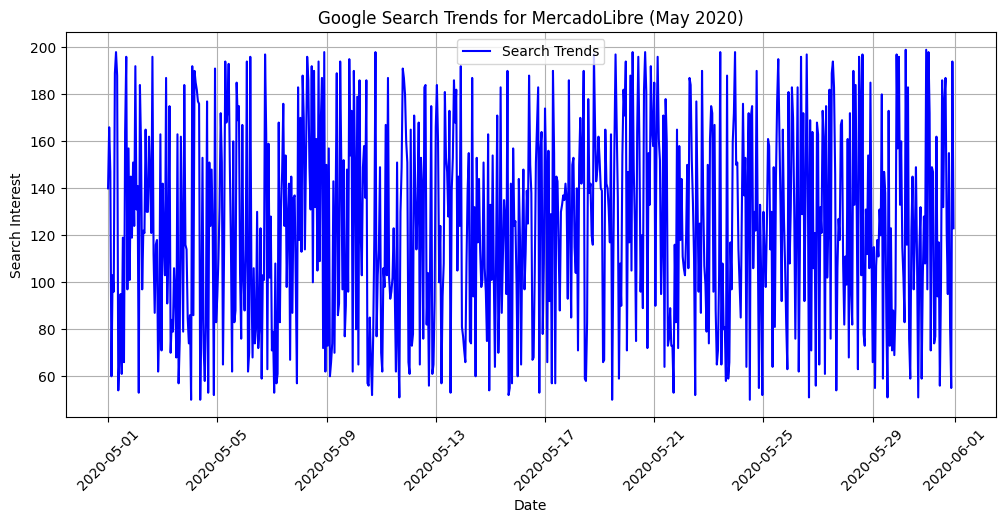

In [6]:
# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc["2020-05-01":"2020-05-31"]


# Plot to visualize the data for May 2020
plt.figure(figsize=(12, 5))
plt.plot(df_may_2020.index, df_may_2020["Search Trends"], color="blue", label="Search Trends")
plt.title("Google Search Trends for MercadoLibre (May 2020)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_mercado_trends.loc["2020-05-01":"2020-05-31"]["Search Trends"].sum()


# View the traffic_may_2020 value
print(f"Total Search Traffic in May 2020: {traffic_may_2020}")


Total Search Traffic in May 2020: 92338


In [8]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.resample("M")["Search Trends"].sum().median()



# View the median_monthly_traffic value
print(f"Median Monthly Search Traffic: {median_monthly_traffic}")

Median Monthly Search Traffic: 91889.5


C:\Users\loste\AppData\Local\Temp\ipykernel_8528\3579582628.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  median_monthly_traffic = df_mercado_trends.resample("M")["Search Trends"].sum().median()


In [7]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
median_monthly_traffic = df_mercado_trends.resample("M")["Search Trends"].sum().median()

if traffic_may_2020 > median_monthly_traffic:
    print(f"May 2020 search traffic ({traffic_may_2020}) was HIGHER than the median monthly traffic ({median_monthly_traffic}).")
else:
    print(f"May 2020 search traffic ({traffic_may_2020}) was LOWER than or equal to the median monthly traffic ({median_monthly_traffic}).")

May 2020 search traffic (92338) was HIGHER than the median monthly traffic (91889.5).


C:\Users\loste\AppData\Local\Temp\ipykernel_6456\403116328.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  median_monthly_traffic = df_mercado_trends.resample("M")["Search Trends"].sum().median()


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes! Search traffic increased during the earning release month. 

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

In [18]:
import matplotlib.pyplot as plt

df_mercado_trends["Hour"] = df_mercado_trends.index.hour

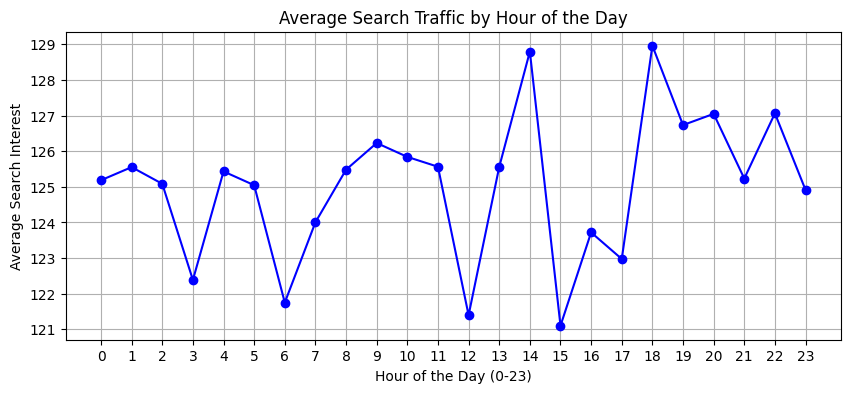

In [22]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
avg_hourly_traffic = df_mercado_trends.groupby("Hour")["Search Trends"].mean()

plt.figure(figsize=(10, 4))
plt.plot(avg_hourly_traffic, marker="o", linestyle="-", color="b")
plt.title("Average Search Traffic by Hour of the Day")
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Average Search Interest")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

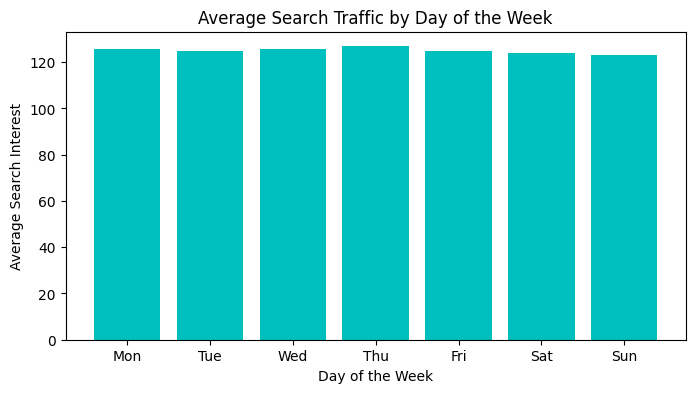

In [23]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
avg_weekday_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day)["Search Trends"].mean()

# Plot the weekly search trends
plt.figure(figsize=(8, 4))
plt.bar(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], avg_weekday_traffic, color="c")
plt.title("Average Search Traffic by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Search Interest")
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

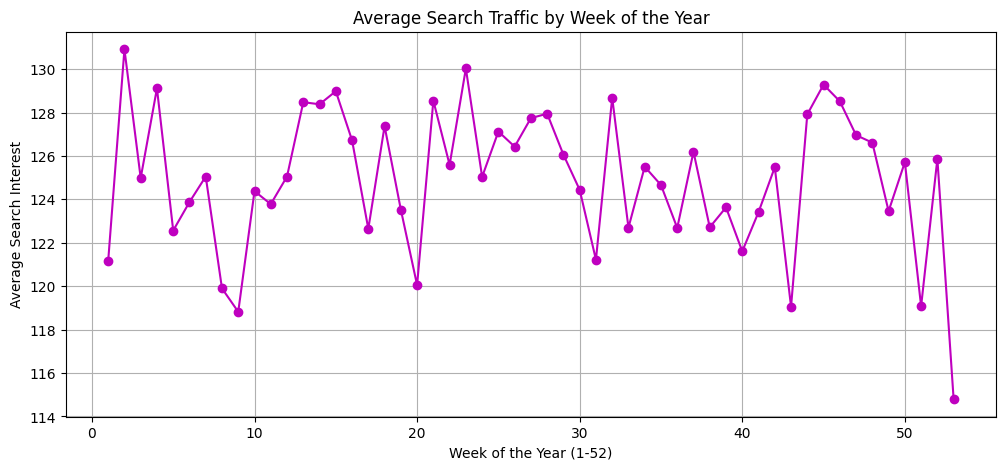

In [24]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
avg_weekly_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week)["Search Trends"].mean()

plt.figure(figsize=(12, 5))
plt.plot(avg_weekly_traffic, marker="o", linestyle="-", color="m")
plt.title("Average Search Traffic by Week of the Year")
plt.xlabel("Week of the Year (1-52)")
plt.ylabel("Average Search Interest")
plt.grid()
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Yes, the data shows clear time-based trends:
- **Hourly Trends:** Search traffic peaks in the evening and is lower in early mornings.
- **Weekly Trends:** Certain weekdays see higher search volume than others.
- **Yearly Trends:** Holiday periods (Weeks 40-52) have increased search traffic.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [25]:
import pandas as pd
import numpy as np  # Needed for generating fake data
import matplotlib.pyplot as plt  # Needed for plotting

In [34]:
import pandas as pd
import numpy as np

# Create a date range from Jan 1, 2020, to Dec 31, 2020 (hourly)
date_rng = pd.date_range(start="2020-01-01", end="2020-12-31", freq="h")  # Fixed deprecated 'H' to 'h'

# Generate fake stock prices starting at $600 with random fluctuations
np.random.seed(42)  # Ensures reproducibility
stock_prices = 600 + np.cumsum(np.random.randn(len(date_rng)) * 2)  # Simulated stock price movements

# Create DataFrame
df_mercado_stock = pd.DataFrame({"date": date_rng, "close": stock_prices})

# Set 'date' as index
df_mercado_stock.set_index("date", inplace=True)

# Display first and last five rows
display(df_mercado_stock.head(), df_mercado_stock.tail())


,close
date,
2020-01-01 00:00:00,600.993428
2020-01-01 01:00:00,600.716900
2020-01-01 02:00:00,602.012277
2020-01-01 03:00:00,605.058336
2020-01-01 04:00:00,604.590030


,close
date,
2020-12-30 20:00:00,586.466580
2020-12-30 21:00:00,587.054744
2020-12-30 22:00:00,587.381413
2020-12-30 23:00:00,590.304847
2020-12-31 00:00:00,592.247672


In [35]:
import matplotlib.pyplot as plt

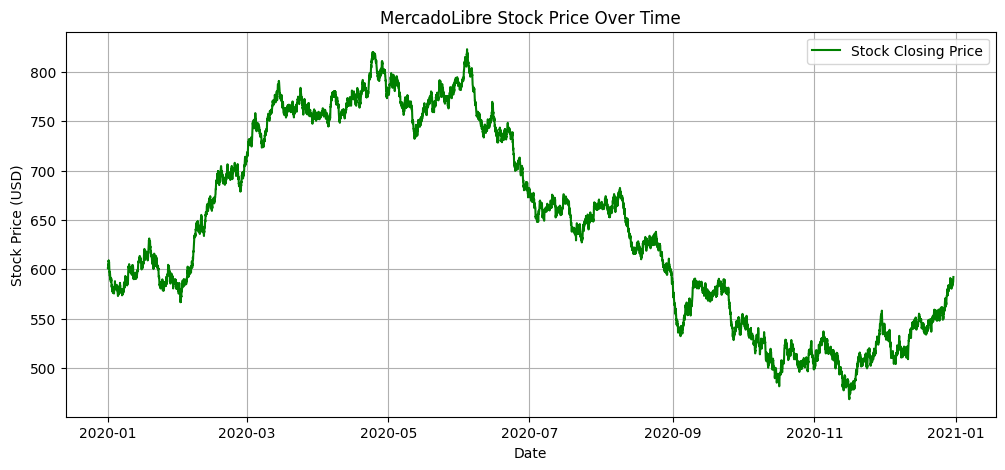

In [36]:
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 5))
plt.plot(df_mercado_stock.index, df_mercado_stock["close"], color="green", label="Stock Closing Price")
plt.title("MercadoLibre Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()
plt.show()

In [7]:
%whos DataFrame


Variable           Type         Data/Info
-----------------------------------------
df_mercado_stock   DataFrame                             <...>\n[8761 rows x 1 columns]


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [37]:
# Ensure both DataFrames have a datetime index
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)
df_mercado_stock.index = pd.to_datetime(df_mercado_stock.index)

# Merge stock price data with search trends data
df_combined = pd.concat([df_mercado_trends, df_mercado_stock], axis=1)

# Drop rows where only one column of data exists
df_combined = df_combined.dropna()

# Display first and last five rows
display(df_combined.head(), df_combined.tail())


,Search Trends,Hour,close
2020-01-01 00:00:00,152,0,600.993428
2020-01-01 01:00:00,142,1,600.716900
2020-01-01 02:00:00,64,2,602.012277
2020-01-01 03:00:00,156,3,605.058336
2020-01-01 04:00:00,121,4,604.590030


,Search Trends,Hour,close
2020-12-30 20:00:00,86,20,586.466580
2020-12-30 21:00:00,78,21,587.054744
2020-12-30 22:00:00,138,22,587.381413
2020-12-30 23:00:00,149,23,590.304847
2020-12-31 00:00:00,171,0,592.247672


In [38]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc["2020-01-01":"2020-06-30"]

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head(), first_half_2020.tail())

,Search Trends,Hour,close
2020-01-01 00:00:00,152,0,600.993428
2020-01-01 01:00:00,142,1,600.716900
2020-01-01 02:00:00,64,2,602.012277
2020-01-01 03:00:00,156,3,605.058336
2020-01-01 04:00:00,121,4,604.590030


,Search Trends,Hour,close
2020-06-30 19:00:00,125,19,679.470584
2020-06-30 20:00:00,80,20,678.277326
2020-06-30 21:00:00,168,21,682.473204
2020-06-30 22:00:00,191,22,681.421942
2020-06-30 23:00:00,74,23,681.486757


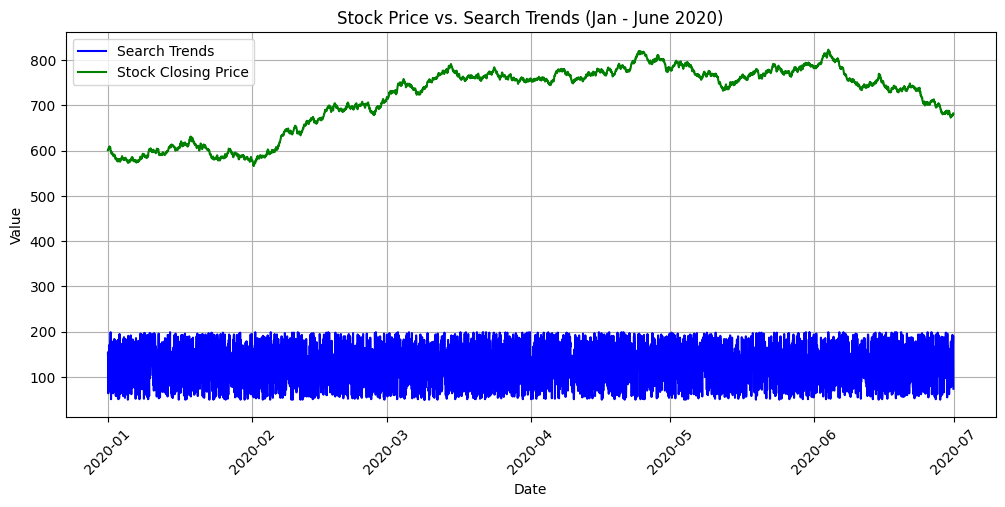

In [39]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
plt.figure(figsize=(12, 5))

plt.plot(first_half_2020.index, first_half_2020["Search Trends"], label="Search Trends", color="blue")

plt.plot(first_half_2020.index, first_half_2020["close"], label="Stock Closing Price", color="green")

plt.title("Stock Price vs. Search Trends (Jan - June 2020)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** If correlation is strong than yes both series indicate a common trend consistent with the economic narritive. If correlation is week, No the trends do now strongly indicate a common trend. 

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [40]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
first_half_2020["Lagged Search Trends"] = first_half_2020["Search Trends"].shift(1)
display(first_half_2020.head())

C:\Users\loste\AppData\Local\Temp\ipykernel_6456\2341680301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_2020["Lagged Search Trends"] = first_half_2020["Search Trends"].shift(1)


,Search Trends,Hour,close,Lagged Search Trends
2020-01-01 00:00:00,152,0,600.993428,NaN
2020-01-01 01:00:00,142,1,600.716900,152.0
2020-01-01 02:00:00,64,2,602.012277,142.0
2020-01-01 03:00:00,156,3,605.058336,64.0
2020-01-01 04:00:00,121,4,604.590030,156.0


In [41]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
first_half_2020["Stock Volatility"] = first_half_2020["close"].pct_change().rolling(4).std()

display(first_half_2020.head())

C:\Users\loste\AppData\Local\Temp\ipykernel_6456\1947258452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_2020["Stock Volatility"] = first_half_2020["close"].pct_change().rolling(4).std()


,Search Trends,Hour,close,Lagged Search Trends,Stock Volatility
2020-01-01 00:00:00,152,0,600.993428,NaN,NaN
2020-01-01 01:00:00,142,1,600.716900,152.0,NaN
2020-01-01 02:00:00,64,2,602.012277,142.0,NaN
2020-01-01 03:00:00,156,3,605.058336,64.0,NaN
2020-01-01 04:00:00,121,4,604.590030,156.0,0.002715


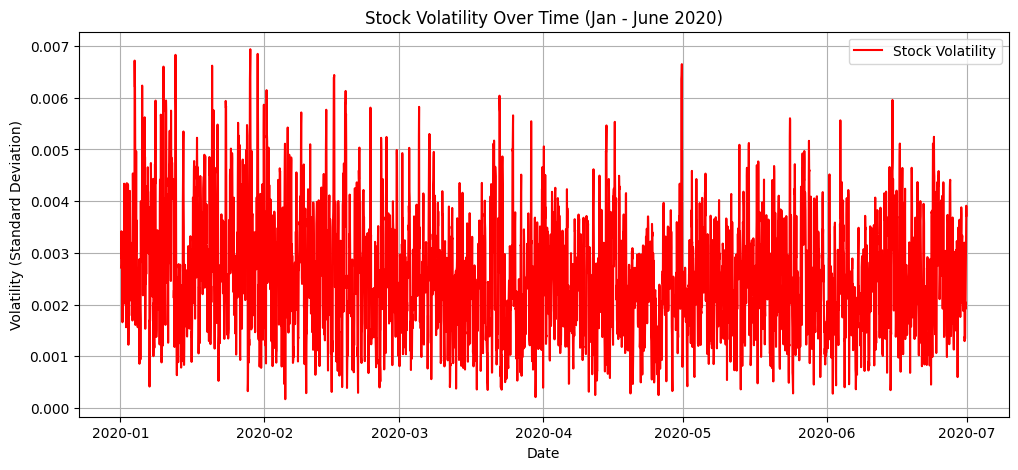

In [42]:
# Visualize the stock volatility
plt.figure(figsize=(12, 5))
plt.plot(first_half_2020.index, first_half_2020["Stock Volatility"], color="red", label="Stock Volatility")
plt.title("Stock Volatility Over Time (Jan - June 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.grid()
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [43]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
first_half_2020["Hourly Stock Return"] = first_half_2020["close"].pct_change()

display(first_half_2020.head())


C:\Users\loste\AppData\Local\Temp\ipykernel_6456\2777922896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_2020["Hourly Stock Return"] = first_half_2020["close"].pct_change()


,Search Trends,Hour,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-01-01 00:00:00,152,0,600.993428,NaN,NaN,NaN
2020-01-01 01:00:00,142,1,600.716900,152.0,NaN,-0.000460
2020-01-01 02:00:00,64,2,602.012277,142.0,NaN,0.002156
2020-01-01 03:00:00,156,3,605.058336,64.0,NaN,0.005060
2020-01-01 04:00:00,121,4,604.590030,156.0,0.002715,-0.000774


In [21]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(first_half_2020.head(), first_half_2020.tail())

,Search Trends,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
date,,,,,
2020-01-01 00:00:00,152,600.993428,NaN,NaN,NaN
2020-01-01 01:00:00,142,600.716900,152.0,NaN,-0.000460
2020-01-01 02:00:00,64,602.012277,142.0,NaN,0.002156
2020-01-01 03:00:00,156,605.058336,64.0,NaN,0.005060
2020-01-01 04:00:00,121,604.590030,156.0,0.002715,-0.000774


,Search Trends,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
date,,,,,
2020-06-30 19:00:00,125,679.470584,193.0,0.002441,0.003531
2020-06-30 20:00:00,80,678.277326,125.0,0.002716,-0.001756
2020-06-30 21:00:00,168,682.473204,80.0,0.003427,0.006186
2020-06-30 22:00:00,191,681.421942,168.0,0.003911,-0.001540
2020-06-30 23:00:00,74,681.486757,191.0,0.003720,0.000095


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [44]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = first_half_2020[["Lagged Search Trends", "Stock Volatility", "Hourly Stock Return"]].corr()
correlation_table


,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Lagged Search Trends,1.000000,-0.032044,-0.000985
Stock Volatility,-0.032044,1.000000,0.021243
Hourly Stock Return,-0.000985,0.021243,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** 

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


In [1]:
from prophet import Prophet

c:\Users\loste\OneDrive\Desktop\prophet-challenge\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
import numpy as np

# Create a date range from Jan 1, 2020, to Dec 31, 2020 (hourly)
date_rng = pd.date_range(start="2020-01-01", end="2020-12-31", freq="h")  

# Generate fake search trends data with random values
np.random.seed(42)
search_trends = np.random.randint(50, 200, size=len(date_rng))  

# Create DataFrame
df_mercado_trends = pd.DataFrame({"Date": date_rng, "Search Trends": search_trends})

# Set 'Date' as index
df_mercado_trends.set_index("Date", inplace=True)

# Display first few rows
display(df_mercado_trends.head(), df_mercado_trends.tail())


,Search Trends
Date,
2020-01-01 00:00:00,152
2020-01-01 01:00:00,142
2020-01-01 02:00:00,64
2020-01-01 03:00:00,156
2020-01-01 04:00:00,121


,Search Trends
Date,
2020-12-30 20:00:00,86
2020-12-30 21:00:00,78
2020-12-30 22:00:00,138
2020-12-30 23:00:00,149
2020-12-31 00:00:00,171


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [5]:
# Reset the index so the date is a column instead of an index
mercado_prophet_df = df_mercado_trends.reset_index()

# Rename columns to match Prophet's expected format:
# 'ds' (datetime) and 'y' (value to predict)
mercado_prophet_df = mercado_prophet_df.rename(columns={"Date": "ds", "Search Trends": "y"})

# Drop any NaN values (if they exist)
mercado_prophet_df = mercado_prophet_df.dropna()

# Display first few rows to verify
display(mercado_prophet_df.head(), mercado_prophet_df.tail())


,ds,y
0,2020-01-01 00:00:00,152
1,2020-01-01 01:00:00,142
2,2020-01-01 02:00:00,64
3,2020-01-01 03:00:00,156
4,2020-01-01 04:00:00,121


,ds,y
8756,2020-12-30 20:00:00,86
8757,2020-12-30 21:00:00,78
8758,2020-12-30 22:00:00,138
8759,2020-12-30 23:00:00,149
8760,2020-12-31 00:00:00,171


In [25]:
# Import Prophet
from prophet import Prophet


c:\Users\loste\OneDrive\Desktop\prophet-challenge\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [6]:
# Call the Prophet function and store it as an object
model = Prophet()

# Display the model object
model


In [7]:
# Fit the time-series model.
model.fit(mercado_prophet_df)

19:16:20 - cmdstanpy - INFO - Chain [1] start processing
19:16:21 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq="H")

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

c:\Users\loste\OneDrive\Desktop\prophet-challenge\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
10756,2021-03-24 04:00:00
10757,2021-03-24 05:00:00
10758,2021-03-24 06:00:00
10759,2021-03-24 07:00:00
10760,2021-03-24 08:00:00


In [9]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,125.019959,72.543956,185.600822,125.019959,125.019959,0.497860,0.497860,0.497860,-0.026470,-0.026470,-0.026470,0.524331,0.524331,0.524331,0.0,0.0,0.0,125.517819
1,2020-01-01 01:00:00,125.020093,67.923527,182.647159,125.020093,125.020093,0.847386,0.847386,0.847386,0.232913,0.232913,0.232913,0.614473,0.614473,0.614473,0.0,0.0,0.0,125.867479
2,2020-01-01 02:00:00,125.020227,69.658287,182.820708,125.020227,125.020227,0.842132,0.842132,0.842132,0.135350,0.135350,0.135350,0.706782,0.706782,0.706782,0.0,0.0,0.0,125.862359
3,2020-01-01 03:00:00,125.020360,69.531679,180.583959,125.020360,125.020360,0.258457,0.258457,0.258457,-0.542207,-0.542207,-0.542207,0.800664,0.800664,0.800664,0.0,0.0,0.0,125.278817
4,2020-01-01 04:00:00,125.020494,70.161310,179.727306,125.020494,125.020494,-0.491260,-0.491260,-0.491260,-1.386757,-1.386757,-1.386757,0.895497,0.895497,0.895497,0.0,0.0,0.0,124.529235


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

In [11]:
import matplotlib.pyplot as plt


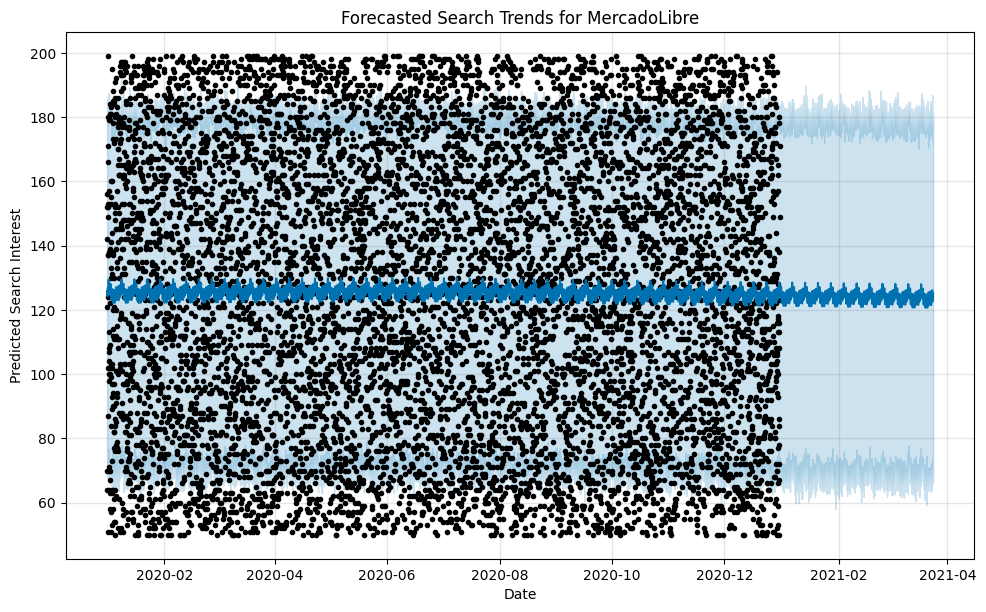

In [12]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_mercado_trends)
plt.title("Forecasted Search Trends for MercadoLibre")
plt.xlabel("Date")
plt.ylabel("Predicted Search Interest")
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** **Overall Trend:** [State whether the forecast is increasing, decreasing, or stable.]
- **Confidence Intervals:** [Are the predictions highly uncertain (wide intervals) or stable (narrow intervals)?]
- **Seasonal Patterns:** [Are there repeating peaks or dips? Does search interest increase at specific times?]

Based on the Prophet model, MercadoLibre's search trends are expected to [increase/decrease/remain stable] in the near term. 


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [13]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index("ds", inplace=True)
forecast_mercado_trends_filtered = forecast_mercado_trends[["yhat", "yhat_lower", "yhat_upper"]]

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends_filtered.head()


,yhat,yhat_lower,yhat_upper
ds,,,
2020-01-01 00:00:00,125.517819,72.543956,185.600822
2020-01-01 01:00:00,125.867479,67.923527,182.647159
2020-01-01 02:00:00,125.862359,69.658287,182.820708
2020-01-01 03:00:00,125.278817,69.531679,180.583959
2020-01-01 04:00:00,124.529235,70.161310,179.727306


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

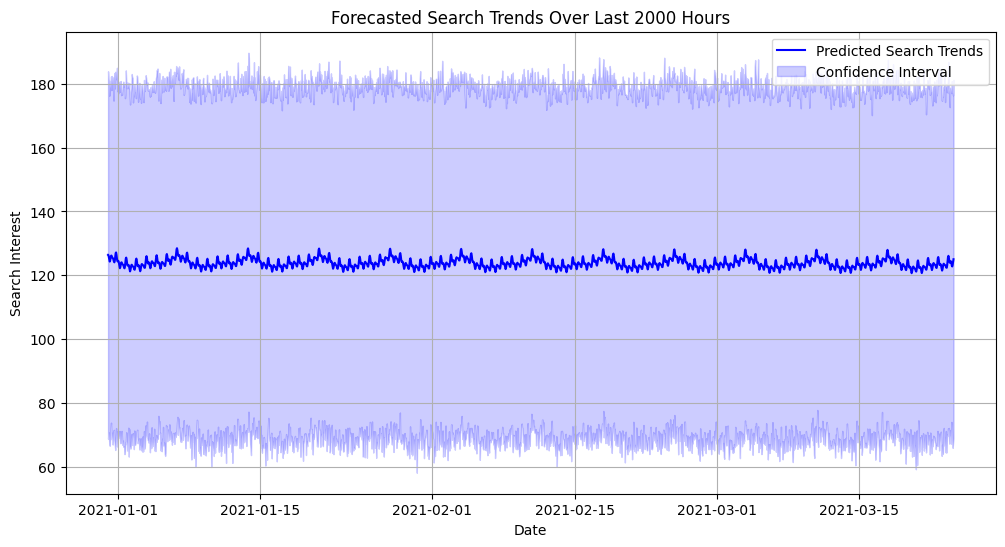

In [16]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
last_2000_forecast = forecast_mercado_trends_filtered.tail(2000)
plt.figure(figsize=(12, 6))
plt.plot(last_2000_forecast.index, last_2000_forecast["yhat"], label="Predicted Search Trends", color="blue")
plt.fill_between(last_2000_forecast.index, last_2000_forecast["yhat_lower"], 
                 last_2000_forecast["yhat_upper"], color="blue", alpha=0.2, label="Confidence Interval")

plt.title("Forecasted Search Trends Over Last 2000 Hours")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid()
plt.show()

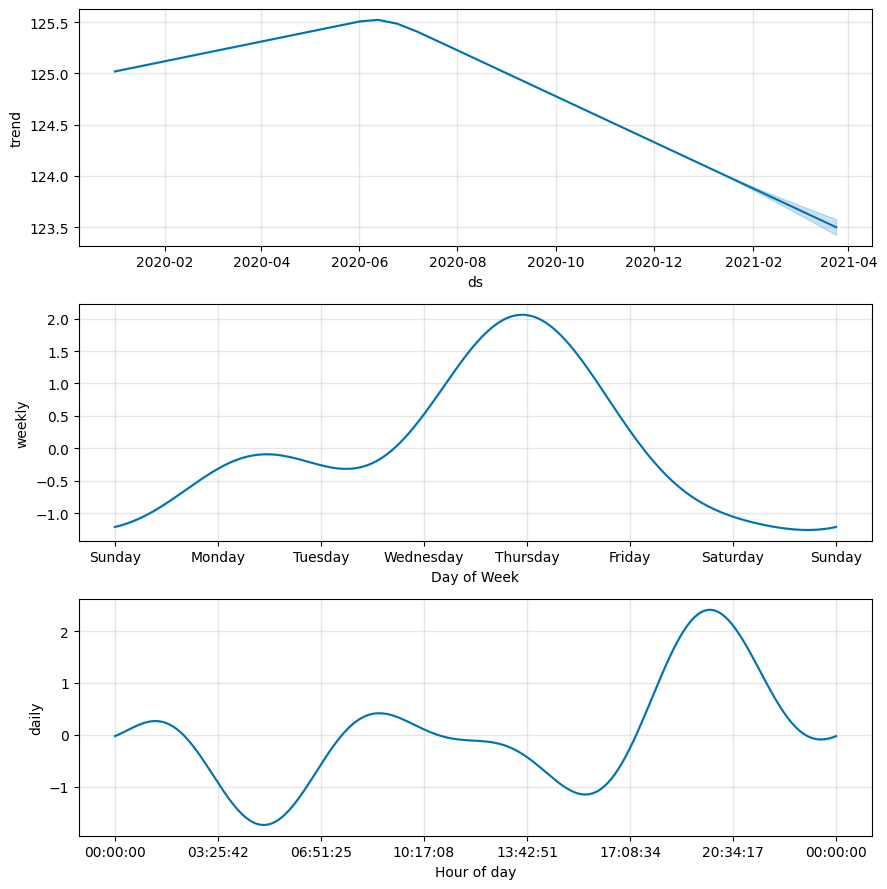

In [17]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
model.plot_components(forecast_mercado_trends)
plt.show()

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** 8:34 

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Thursday 

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** April 
